In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm

## 0) Data Load

In [6]:
train_16 = pd.read_csv('train_2016_v2.csv',parse_dates=['transactiondate'],dtype={'parcelid':int})

In [7]:
prop_16 = pd.read_csv('properties_2016.csv',dtype={'fireplaceflag':object, 'taxdelinquencyflag':object, 'fireplaceflag':object, 'propertyzoningdesc':object, 'propertycountylandusecode':object, 'hashottuborspa':object})

In [8]:
train_df1 = pd.merge(train_16,prop_16,on='parcelid', how ='left')

In [9]:
train_df = train_df1.copy()

2017년도 데이터는 생략하겠습니다.

# 1) Analysis SQRT-Feature

## 1.1) Overview the SQRT-feature data

- 'basementsqft'
- 'finishedfloor1squarefeet'
- 'calculatedfinishedsquarefeet'
- 'finishedsquarefeet6'
- 'finishedsquarefeet12'
- 'finishedsquarefeet13'
- 'finishedsquarefeet15'
- 'finishedsquarefeet50'
- 'lotsizesquarefeet'

In [1]:
sqrt_feature= [
        '지하 square foot(평수를 의미)',
          '집 내 3/4 욕실 수 (샤워 + 세면대 + 화장실)',
          '가정의 첫 번째 (출입국) 층에있는 완숙 지역의 크기',
        '미완성 완전 공간 지역',
        '완성된 주요 주거 공간',
        '주변 생활 공간',
        '전체 면적',
        '1층 면적',
       ' 로트 면적(lot는 area of zoning lot을 의미한다.)'
]

In [2]:
sqrt_feature_col =[
    'basementsqft',
'finishedfloor1squarefeet',
'calculatedfinishedsquarefeet',
'finishedsquarefeet6',
'finishedsquarefeet12',
'finishedsquarefeet13',
'finishedsquarefeet15',
'finishedsquarefeet50',
'lotsizesquarefeet'
]

In [5]:
sqrt_df = pd.DataFrame(columns=['name','feature'])
sqrt_df.name = sqrt_feature_col
sqrt_df.feature = sqrt_feature
sqrt_df

,name,feature
0,basementsqft,지하 square foot(평수를 의미)
1,finishedfloor1squarefeet,집 내 3/4 욕실 수 (샤워 + 세면대 + 화장실)
2,calculatedfinishedsquarefeet,가정의 첫 번째 (출입국) 층에있는 완숙 지역의 크기
3,finishedsquarefeet6,미완성 완전 공간 지역
4,finishedsquarefeet12,완성된 주요 주거 공간
5,finishedsquarefeet13,주변 생활 공간
6,finishedsquarefeet15,전체 면적
7,finishedsquarefeet50,1층 면적
8,lotsizesquarefeet,로트 면적(lot는 area of zoning lot을 의미한다.)


## 1.2) Datatype of Columns

In [10]:
print(train_df[sqrt_feature_col].dtypes,end='\n\n'),
print('Number of sqrt_feature_col:  {}'.format(len(sqrt_feature_col)))

basementsqft                    float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet6             float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
lotsizesquarefeet               float64
dtype: object

Number of sqrt_feature_col:  9


SQRT_feature에는 9개의 컬럼이 있고, 모두 float형이다.

## 1.3) Individual columns' feature analysis

### scatter plot about numerical data

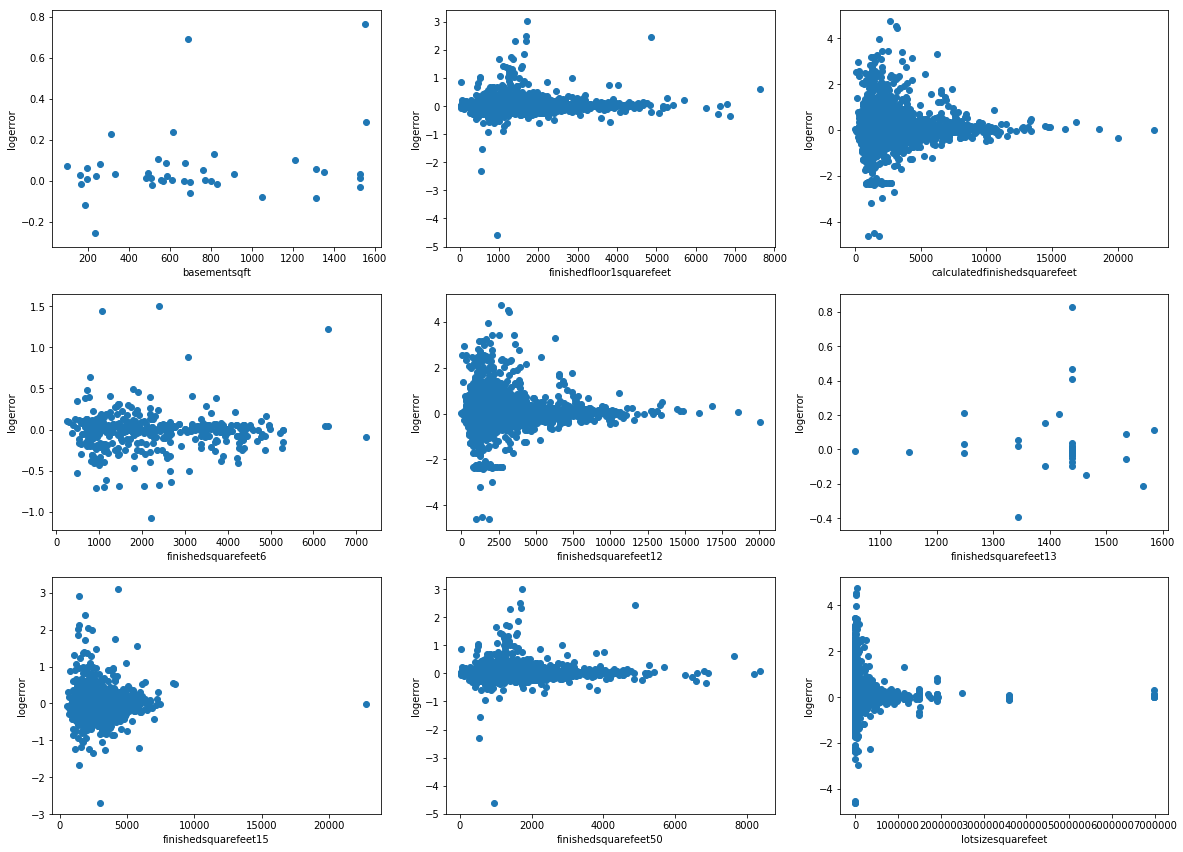

In [12]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(sqrt_feature_col):
    plt.subplot(4,3,idx+1)
    plt.scatter(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

위의 플롯에서 numeric category를 가지고 있을 수 있는 컬럼이 있다고 가정, 카테고리의 갯수를 40개 미만으로 가지는 데이터에 대해서 다시 분포에 대해 시각화해본다.

In [13]:
discrete_sqrt_col = []
for idx,col in enumerate(sqrt_feature_col):
    if len(train_df[col].value_counts())<40:
        print(train_df[col].value_counts())
        discrete_sqrt_col.append(col)
len(discrete_sqrt_col)

1528.0    3
1312.0    2
700.0     2
515.0     1
1350.0    1
802.0     1
168.0     1
671.0     1
540.0     1
510.0     1
198.0     1
234.0     1
330.0     1
913.0     1
1048.0    1
1555.0    1
260.0     1
1551.0    1
100.0     1
676.0     1
557.0     1
760.0     1
814.0     1
312.0     1
608.0     1
616.0     1
184.0     1
1210.0    1
493.0     1
162.0     1
485.0     1
585.0     1
579.0     1
831.0     1
238.0     1
564.0     1
196.0     1
690.0     1
771.0     1
Name: basementsqft, dtype: int64
1440.0    17
1248.0     3
1344.0     3
1392.0     2
1536.0     2
1464.0     1
1416.0     1
1152.0     1
1584.0     1
1056.0     1
1566.0     1
Name: finishedsquarefeet13, dtype: int64


2

- 40 개 미만의 카테고리를 가지는 discrete data column 이 총 2개가 나왔다. 40개 미만의 카테고리값이 주어지긴 했지만 데이터를 자세히 보면 discrete data가 아닌 그냥 data 수가 많지 않은 즉, missing_value가 많은 컬럼임을 알 수 있다.
- 그래도 이 컬럼들에 대해서 stripplot,viloinplot을 적용해 시각화한다.

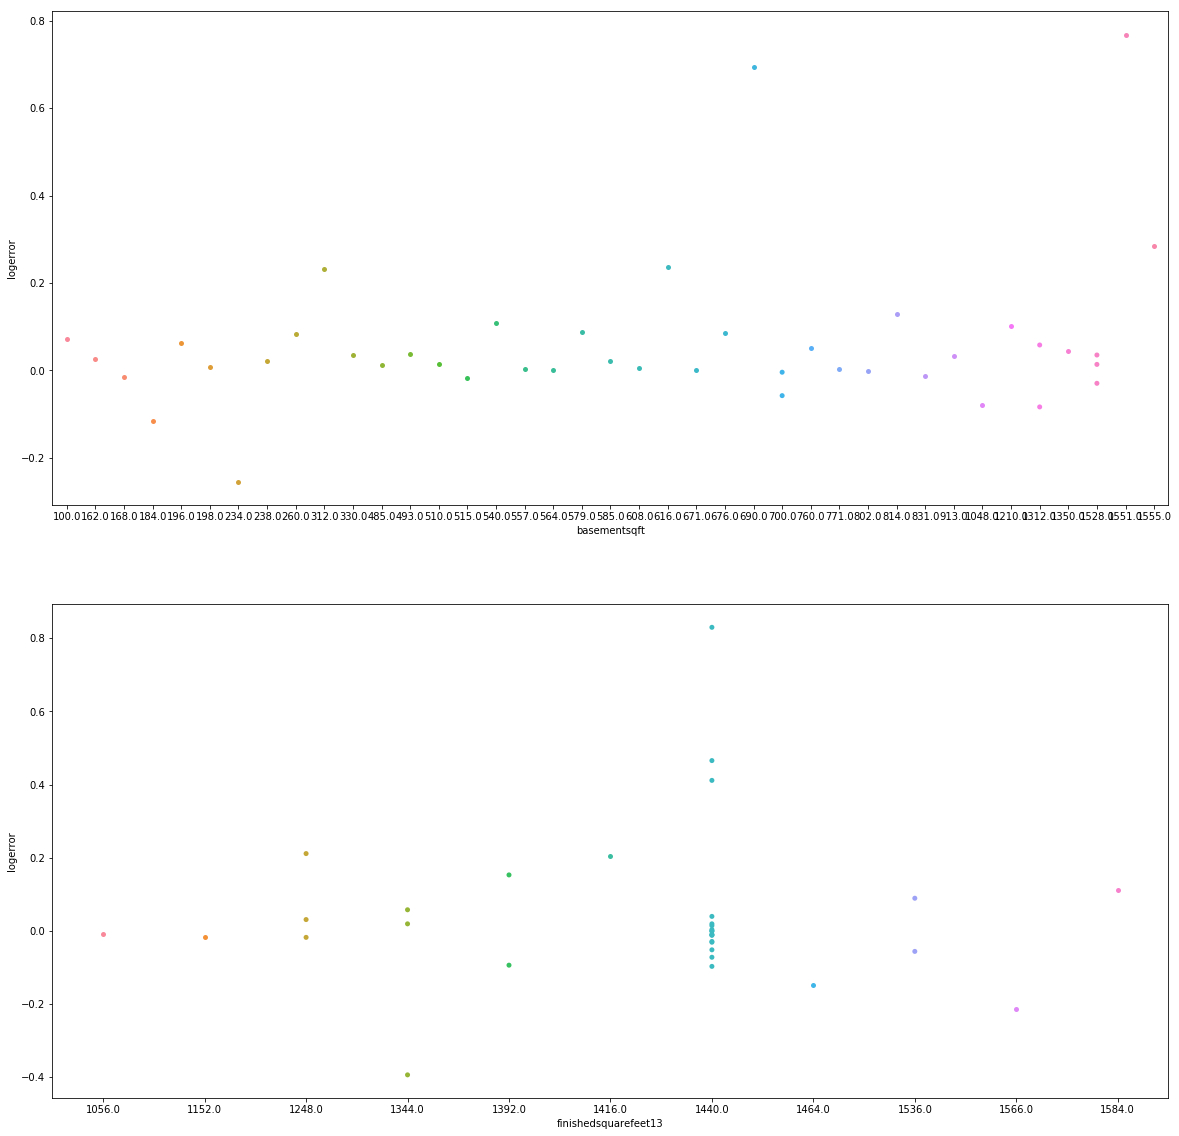

In [15]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(discrete_sqrt_col):
    plt.subplot(2,1,idx+1)
    sns.stripplot(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

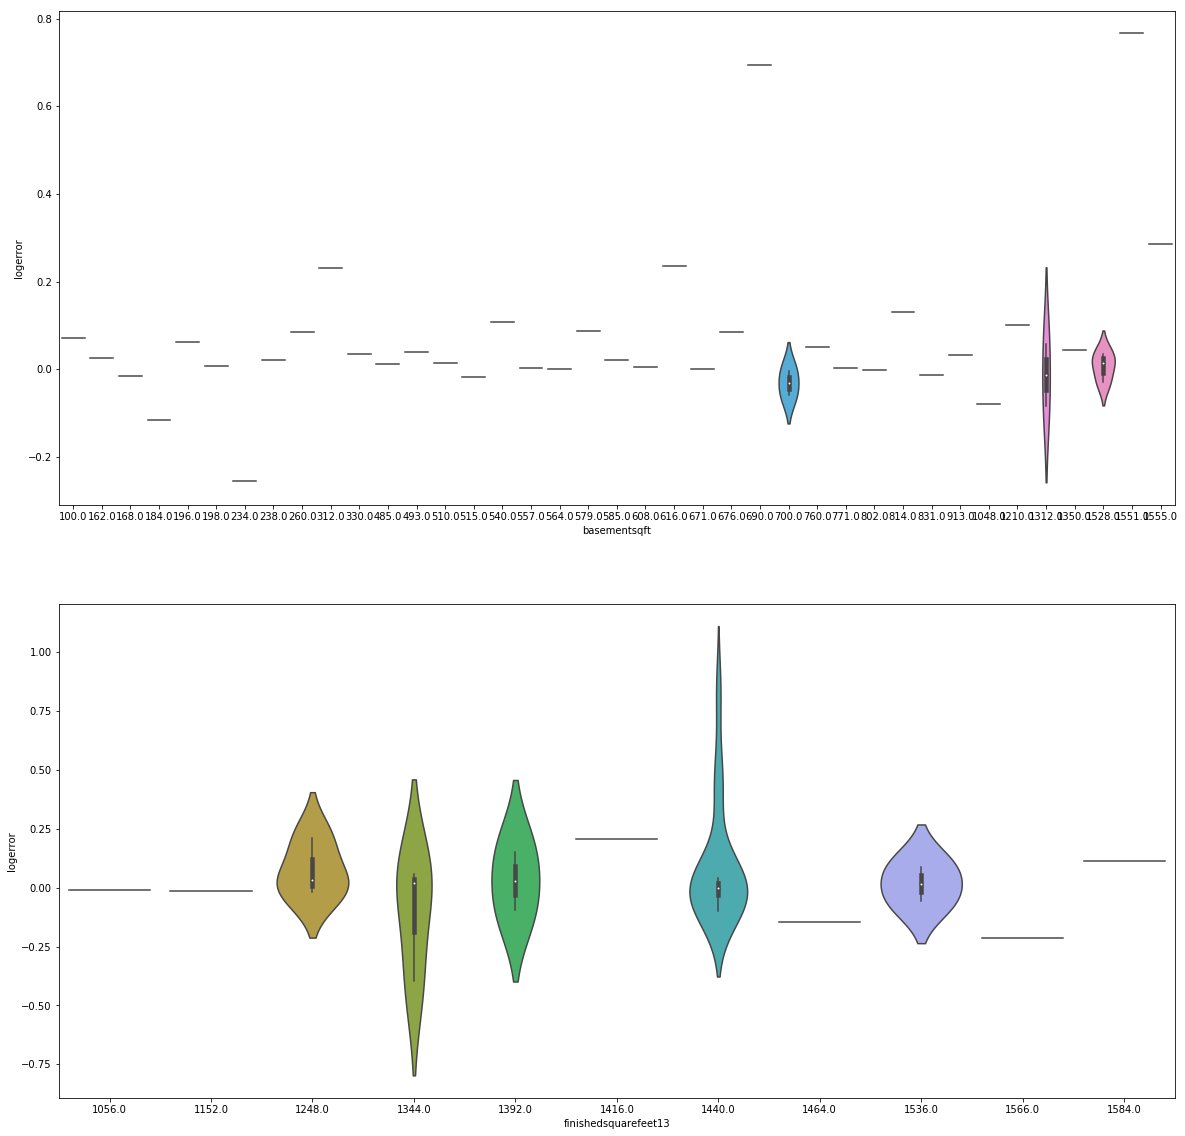

In [18]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(discrete_sqrt_col):
    plt.subplot(2,1,idx+1)
    sns.violinplot(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

# 2) Analysis Missing value 

우선 inner-feature 내의 컬럼들로 구성된 데이터 프레임 'inner_df'를 생성해보겠습니다.

In [19]:
sqrt_df = train_df[sqrt_feature_col]
sqrt_df.tail()

,basementsqft,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,lotsizesquarefeet
90270,NaN,NaN,653.0,NaN,653.0,NaN,NaN,NaN,93676.0
90271,NaN,NaN,2856.0,NaN,2856.0,NaN,NaN,NaN,9343.0
90272,NaN,NaN,2617.0,NaN,NaN,NaN,2617.0,NaN,6865.0
90273,NaN,NaN,1034.0,NaN,1034.0,NaN,NaN,NaN,20033.0
90274,NaN,NaN,1524.0,NaN,1524.0,NaN,NaN,NaN,5124.0


In [20]:
missing_sqrt_df = sqrt_df.isnull().sum().reset_index()
missing_sqrt_df.columns = ['col','missing_cnt']
missing_sqrt_df['missing_ratio'] = missing_sqrt_df.missing_cnt / len(sqrt_df)
missing_sqrt_df

,col,missing_cnt,missing_ratio
0,basementsqft,90232,0.999524
1,finishedfloor1squarefeet,83419,0.924054
2,calculatedfinishedsquarefeet,661,0.007322
3,finishedsquarefeet6,89854,0.995336
4,finishedsquarefeet12,4679,0.051831
5,finishedsquarefeet13,90242,0.999634
6,finishedsquarefeet15,86711,0.960521
7,finishedsquarefeet50,83419,0.924054
8,lotsizesquarefeet,10150,0.112434


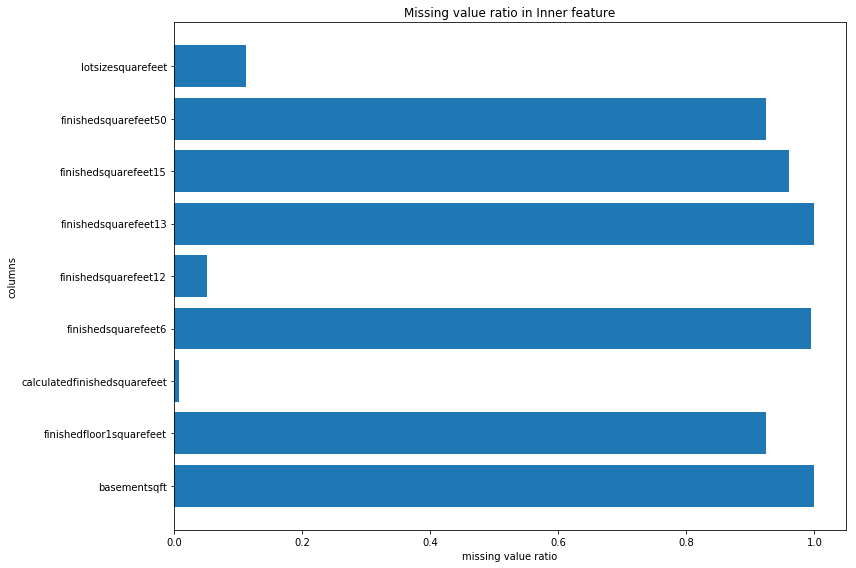

In [21]:
plt.figure(figsize=(12,8))
plt.barh(missing_sqrt_df.col,missing_sqrt_df.missing_ratio)
plt.title('Missing value ratio in Inner feature')
plt.xlabel('missing value ratio')
plt.ylabel('columns')
plt.tight_layout()
plt.show()